<a href="https://colab.research.google.com/github/Rahulchunduruu/Machine-Learning/blob/main/cat_and_dogs_vgg19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import cv2

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers,models,callbacks
from tensorflow.keras.models import Sequential
from PIL import Image,ImageOps
from sklearn.metrics import classification_report,confusion_matrix

In [2]:
#mounting the drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
train_data_cat='/content/drive/MyDrive/new_data_sets/training_set/training_set/cats'
train_data_dog='/content/drive/MyDrive/new_data_sets/training_set/training_set/dogs'
test_data_cat='/content/drive/MyDrive/new_data_sets/archive/test/cats/'
test_data_dog='/content/drive/MyDrive/new_data_sets/archive/test/dogs/'

In [4]:
#creating a label
total_cats_count=[0]*(len(os.listdir(train_data_cat)))
total_dogs_count=[1]*(len(os.listdir(train_data_dog)))
label_data_cat=total_cats_count
label_data_dog=total_dogs_count

In [5]:
#label created and checking how many no cats/dogs label count
label_data_cat.count(0)
label_data_dog.count(1)

4006

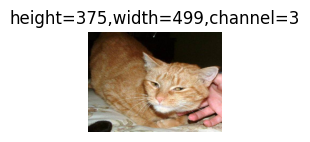

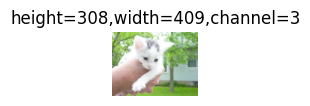

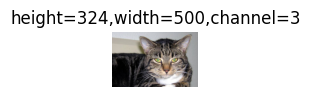

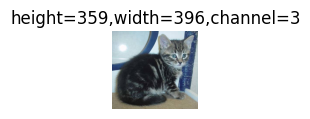

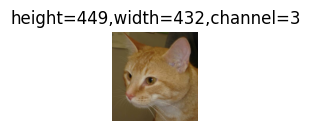

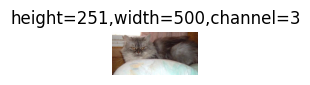

In [6]:
#check the image of cat and dog
plt.figure(figsize=(10,10))
j=0
for i in os.listdir(train_data_cat):
  plt.subplot(2,5,9)
  img=plt.imread(os.path.join(train_data_cat, i)) # Corrected path concatenation
  plt.imshow(img)
  height,width,channel=img.shape
  plt.title(f'height={height},width={width},channel={channel}')
  plt.axis('off')
  plt.show()
  if j==5:
    break
  j+=1

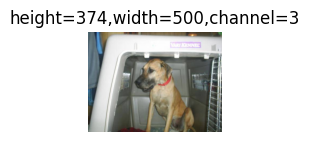

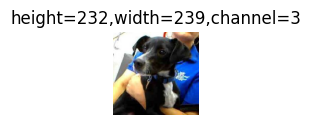

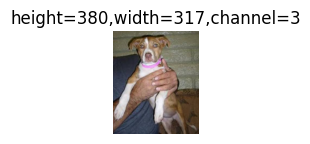

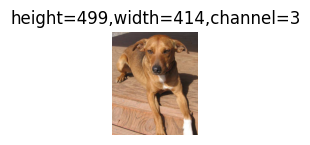

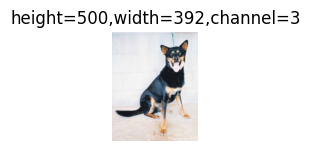

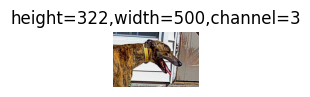

In [7]:
#check the image of cat and dog
plt.figure(figsize=(10,10))
j=0
for i in os.listdir(train_data_dog):
  plt.subplot(2,5,9)
  img=plt.imread(os.path.join(train_data_dog,i)) # Corrected path concatenation
  plt.imshow(img)
  height,width,channel=img.shape
  plt.title(f'height={height},width={width},channel={channel}')
  plt.axis('off')
  plt.show()
  if j==5:
    break
  j+=1

In [8]:
train_image_cat=[]
for i in os.listdir(train_data_cat):
  train_image_cat.append(os.path.join(train_data_cat,i))
train_image_cat

['/content/drive/MyDrive/new_data_sets/training_set/training_set/cats/cat.3587.jpg',
 '/content/drive/MyDrive/new_data_sets/training_set/training_set/cats/cat.3734.jpg',
 '/content/drive/MyDrive/new_data_sets/training_set/training_set/cats/cat.358.jpg',
 '/content/drive/MyDrive/new_data_sets/training_set/training_set/cats/cat.3591.jpg',
 '/content/drive/MyDrive/new_data_sets/training_set/training_set/cats/cat.3664.jpg',
 '/content/drive/MyDrive/new_data_sets/training_set/training_set/cats/cat.3590.jpg',
 '/content/drive/MyDrive/new_data_sets/training_set/training_set/cats/cat.37.jpg',
 '/content/drive/MyDrive/new_data_sets/training_set/training_set/cats/cat.367.jpg',
 '/content/drive/MyDrive/new_data_sets/training_set/training_set/cats/cat.365.jpg',
 '/content/drive/MyDrive/new_data_sets/training_set/training_set/cats/cat.3715.jpg',
 '/content/drive/MyDrive/new_data_sets/training_set/training_set/cats/cat.3699.jpg',
 '/content/drive/MyDrive/new_data_sets/training_set/training_set/cats/

In [9]:
train_image_dog=[]
for i in os.listdir(train_data_dog):
  train_image_dog.append(os.path.join(train_data_dog,i))
train_image_dog

['/content/drive/MyDrive/new_data_sets/training_set/training_set/dogs/dog.3703.jpg',
 '/content/drive/MyDrive/new_data_sets/training_set/training_set/dogs/dog.3670.jpg',
 '/content/drive/MyDrive/new_data_sets/training_set/training_set/dogs/dog.3593.jpg',
 '/content/drive/MyDrive/new_data_sets/training_set/training_set/dogs/dog.3667.jpg',
 '/content/drive/MyDrive/new_data_sets/training_set/training_set/dogs/dog.368.jpg',
 '/content/drive/MyDrive/new_data_sets/training_set/training_set/dogs/dog.3610.jpg',
 '/content/drive/MyDrive/new_data_sets/training_set/training_set/dogs/dog.3622.jpg',
 '/content/drive/MyDrive/new_data_sets/training_set/training_set/dogs/dog.3649.jpg',
 '/content/drive/MyDrive/new_data_sets/training_set/training_set/dogs/dog.356.jpg',
 '/content/drive/MyDrive/new_data_sets/training_set/training_set/dogs/dog.3644.jpg',
 '/content/drive/MyDrive/new_data_sets/training_set/training_set/dogs/dog.3660.jpg',
 '/content/drive/MyDrive/new_data_sets/training_set/training_set/do

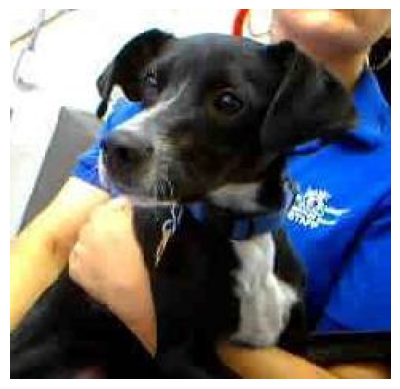

In [10]:
train_image_dog
img=plt.imread(train_image_dog[1])
plt.axis('off')
plt.imshow(img)

In [19]:
#just pass 800 cat and dog images for creating the perfect model
train_img=train_image_dog[:250]+train_image_cat[:250]
train_label=label_data_dog[:250]+label_data_cat[:250]

In [44]:
#count of data

print("input count=",len(train_img))
print("label count=",len(train_label))

input count= 500
label count= 500


enter the random number 1-563=22


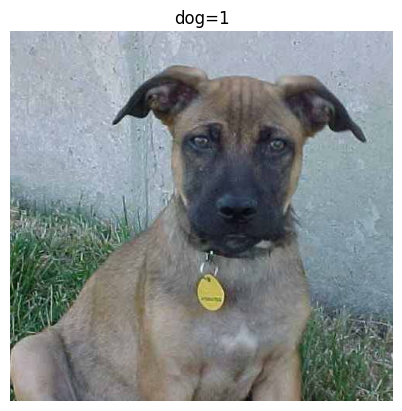

In [45]:
#it is for check whether we given correct label or not
value=int(input("enter the random number 1-563="))
img=plt.imread(train_img[value])
plt.axis('off')
plt.title(f"{'dog' if train_label[value] == 1 else 'cat'}={train_label[value]}")
plt.imshow(img)

array([[[111, 101,  77],
        [106,  96,  72],
        [100,  89,  67],
        ...,
        [ 67, 102,  66],
        [ 64, 112,  63],
        [ 78, 130,  77]],

       [[112, 102,  78],
        [106,  96,  73],
        [101,  90,  68],
        ...,
        [ 64, 104,  62],
        [ 64, 113,  62],
        [ 78, 130,  76]],

       [[113, 103,  79],
        [108,  98,  74],
        [102,  92,  70],
        ...,
        [ 70, 115,  68],
        [ 62, 114,  61],
        [ 77, 131,  76]],

       ...,

       [[117, 124, 111],
        [126, 132, 121],
        [136, 142, 132],
        ...,
        [ 44,  54,  48],
        [ 56,  63,  58],
        [ 65,  71,  66]],

       [[119, 126, 113],
        [128, 134, 123],
        [136, 142, 131],
        ...,
        [ 44,  54,  48],
        [ 55,  62,  57],
        [ 64,  70,  65]],

       [[121, 128, 115],
        [131, 137, 126],
        [136, 142, 131],
        ...,
        [ 44,  54,  48],
        [ 55,  61,  56],
        [ 63,  69,  64]]], dtype=uint8)
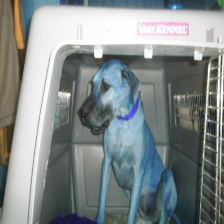

In [84]:
#resize the image 224x224 train_img

resize_train_img=[]

for imgs in train_img:
  img=cv2.imread(imgs)
  if img is not None: # Check if image loaded successfully
    img=cv2.resize(img,(224,224)) # Changed resize dimensions to 80x80
    resize_train_img.append(img)
resize_train_img[0]

In [85]:
resize_train_imgs=[]
for img in resize_train_img:
  resize_train_imgs.append(img.astype('float32')/255)

In [86]:
import numpy as np
# Convert the list of preprocessed images to a single numpy array with the correct shape
train_images_np = np.array(resize_train_imgs)

In [98]:
vgg=keras.applications.VGG19(
    include_top=True,
    weights="imagenet",
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=1000,
    classifier_activation="softmax",
    name="model",
)

In [99]:
vgg.summary()

Model: "model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv4 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv4 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv4 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc1 (Dense)                     │ (None, 4096)           │   102,764,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc2 (Dense)                     │ (None, 4096)           │    16,781,31

 Total params: 143,667,240 (548.05 MB)

 Trainable params: 143,667,240 (548.05 MB)

 Non-trainable params: 0 (0.00 B)

In [100]:
#freeze
for layers in vgg.layers:
  layers.trainable=False

In [101]:
x = vgg.output

In [107]:
pred=keras.layers.Dense(1, activation='sigmoid')(x)

In [108]:
model=keras.Model(inputs=vgg.input,outputs=pred)

In [109]:
early_stop=callbacks.EarlyStopping(monitor='val_loss',patience=5,restore_best_weights=True)

In [110]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy']) # Changed loss to binary_crossentropy

In [111]:
history=model.fit(train_images_np, np.array(train_label), epochs=130, validation_split=0.10,callbacks=[early_stop])

Epoch 1/130
15/15 ━━━━━━━━━━━━━━━━━━━━ 10s 549ms/step - accuracy: 0.5604 - loss: 0.6923 - val_accuracy: 0.0000e+00 - val_loss: 0.7059
Epoch 2/130
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 209ms/step - accuracy: 0.5608 - loss: 0.6914 - val_accuracy: 0.0000e+00 - val_loss: 0.7123
Epoch 3/130
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 210ms/step - accuracy: 0.5617 - loss: 0.6906 - val_accuracy: 0.0000e+00 - val_loss: 0.7176
Epoch 4/130
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 213ms/step - accuracy: 0.5268 - loss: 0.6918 - val_accuracy: 0.0000e+00 - val_loss: 0.7187
Epoch 5/130
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 211ms/step - accuracy: 0.5621 - loss: 0.6896 - val_accuracy: 0.0000e+00 - val_loss: 0.7258
Epoch 6/130
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 211ms/step - accuracy: 0.5624 - loss: 0.6889 - val_accuracy: 0.0000e+00 - val_loss: 0.7328


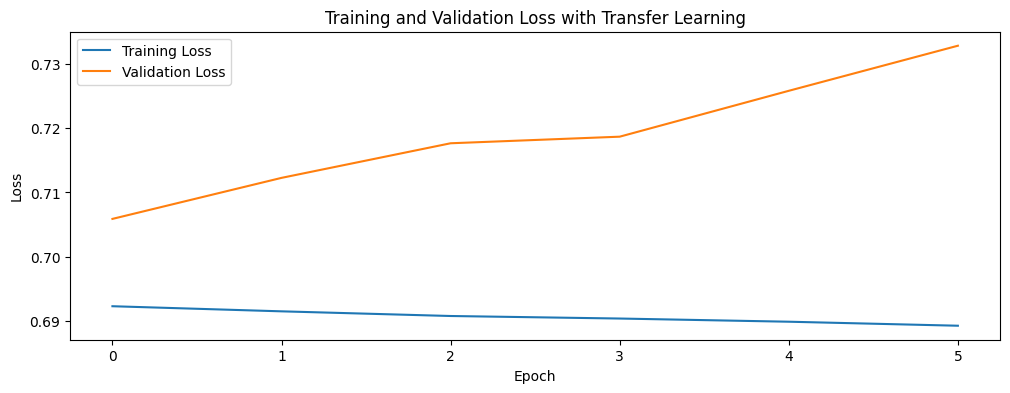

In [112]:
plt.figure(figsize=(12,4))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training and Validation Loss with Transfer Learning")
plt.legend()
plt.show()

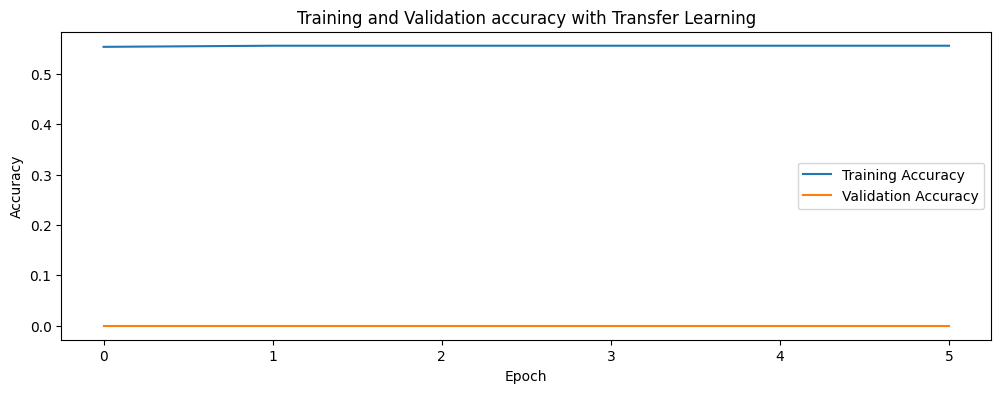

In [113]:
plt.figure(figsize=(12,4))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Training and Validation accuracy with Transfer Learning")
plt.legend()
plt.show()

In [114]:
model.save('mnist_cnn_model.keras')

In [64]:
def predict_image(image_path, model):
  img = cv2.imread(image_path) # Reads image as BGR, shape (H, W, 3)
  img = cv2.resize(img, (224,224)) # Correct way to resize with OpenCV, maintains 3 channels
  img_array = img.astype('float32')/255
  img_array = np.expand_dims(img_array, axis=0) # Add batch dimension, shape (1, 80, 80, 3)

  prediction = model.predict(img_array)
  # For binary classification with sigmoid output, prediction is a single probability
  # prediction[0][0] gives the probability of the positive class (dog)
  predicted_class_label = 1 if prediction[0][0] > 0.5 else 0 # Assuming 1 is dog, 0 is cat
  confidence = prediction[0][0]
  return predicted_class_label, confidence

In [115]:
def load_and_predict(image_path):
  loaded_model = tf.keras.models.load_model('/content/mnist_cnn_model.keras')
  predicted_class_label, confidence = predict_image(image_path, loaded_model)

  class_name = 'dog' if predicted_class_label == 1 else 'cat'
  print(f"Predicted class : {class_name}\n")
  print(f"Confidence : {confidence:.2f}\n")

  # Display the image using matplotlib
  # cv2.imread reads as BGR, matplotlib expects RGB. Convert for display.
  img_display = cv2.imread(image_path)
  img_display = cv2.cvtColor(img_display, cv2.COLOR_BGR2RGB)
  plt.imshow(img_display)
  plt.title(f"Predicted: {class_name} (confidence : {confidence:.2f})")
  plt.axis('off')
  plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Predicted class : dog

Confidence : 0.51



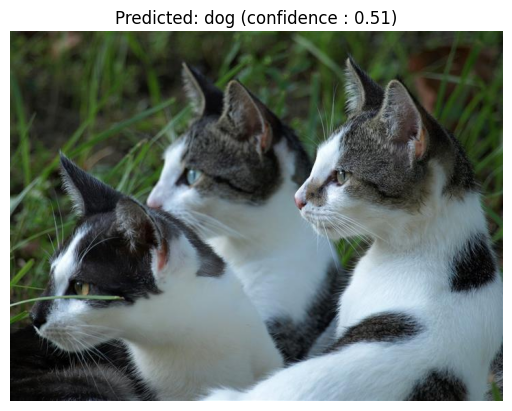

In [116]:
image_path = "/content/Group_of_Cats_Clowder.jpg"
load_and_predict(image_path)

In [117]:
test_data_cats=[]
for i in os.listdir(test_data_cat):
  test_data_cats.append(os.path.join(test_data_cat,i))
test_data_cats

test_data_dogs=[]
for i in os.listdir(test_data_dog):
  test_data_dogs.append(os.path.join(test_data_dog,i))
test_data_dogs

label_data_dog=[1]*(len(test_data_dogs))
label_data_cat=[0]*(len(test_data_cats))

test_img=test_data_cats+test_data_dogs
test_label=label_data_cat+label_data_dog

print(len(test_img),len(test_label))

140 140


In [118]:
resize_test_img=[]
for imgs in test_img:
  img=cv2.imread(imgs)
  img=cv2.resize(img,(224,224))
  resize_test_img.append(img)

resize_test_imgs=[]
for img in resize_test_img:
  resize_test_imgs.append(img.astype('float32')/255)

test_images_np = np.array(resize_test_imgs)
test_labels_np = np.array(test_label)

print("Test images shape:", test_images_np.shape)
print("Test labels shape:", test_labels_np.shape)

Test images shape: (140, 224, 224, 3)
Test labels shape: (140,)


In [119]:
# Evaluate the model on the test dataset
loss, accuracy = model.evaluate(test_images_np, test_labels_np)

print(f"\nTest Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy*100}")

5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 401ms/step - accuracy: 0.2873 - loss: 0.6983

Test Loss: 0.6933
Test Accuracy: 50.0


In [120]:
predictions = model.predict(test_images_np)
predicted_classes = (predictions > 0.5).astype(int) # Convert probabilities to binary class (0 or 1)

print("Confusion Matrix:")
cm = confusion_matrix(test_labels_np, predicted_classes)
TN, FP, FN, TP = cm.ravel() # Flatten the 2x2 matrix to get the individual values in order
print('TN=',TN)
print('FP=',FP)
print('FN=',FN)
print('TP=',TP)

print("\nClassification Report:")
print(classification_report(test_labels_np, predicted_classes))

5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 353ms/step
Confusion Matrix:
TN= 0
FP= 70
FN= 0
TP= 70

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        70
           1       0.50      1.00      0.67        70

    accuracy                           0.50       140
   macro avg       0.25      0.50      0.33       140
weighted avg       0.25      0.50      0.33       140



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
